# Pymaceuticals Inc.
---

### Analysis

- Average Tumor Volume of Drug Regimen "Ramicane" and "Capomulin" is smaller compared to other drug regimen.
- Based on the bar graph observed mouse timepoints for "Capomulin" and "Ramicane" is higher than others.
- Comparing the four Drug regimen (Capomulin, Ramicane, Infubinol, and Ceftamin), only Infubinol has one outlier which is visible through the box plot.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID_df = mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]
duplicate_mice_ID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mice_ID)==False]
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean= mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
Median = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
Variance = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
Std_Dev = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
Std_Err = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
df = pd.concat([Mean,Median,Variance,Std_Dev,Std_Err],axis=1)
df.columns = ['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev.','Tumor Volume Std. Err.']
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
sem = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# Using the aggregation method, produce the same summary statistics in a single line
result = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
result

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

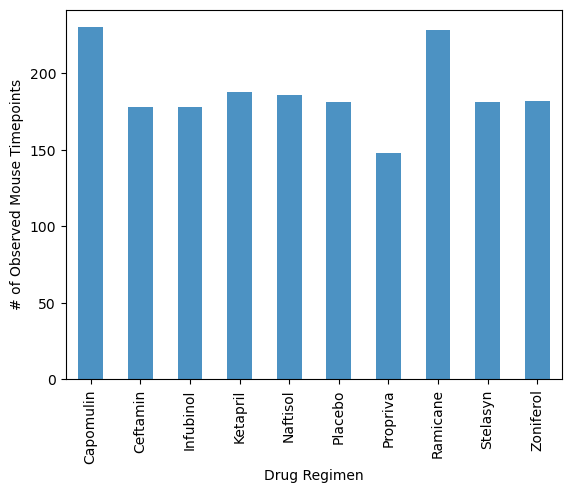

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouseid_drugregimen = mouse_study_clean.groupby(["Drug Regimen"])['Mouse ID'].count()
mouseid_drugregimen.plot(kind = "bar",alpha=0.8,ylabel="# of Observed Mouse Timepoints")

In [10]:
mouseid_drugregimen
x = mouse_study_clean["Drug Regimen"].unique()
x

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

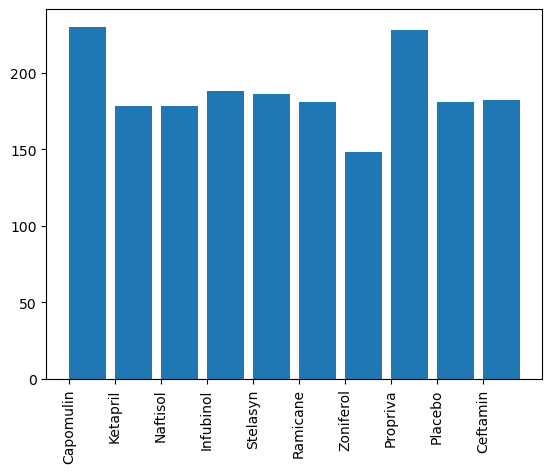

<Figure size 600x400 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y = mouse_study_clean.groupby(["Drug Regimen"])['Mouse ID'].count().tolist()
plt.bar(x,y, alpha=1, align="edge")
plt.xticks(rotation="vertical")

plt.figure(figsize=(6,4))
plt.show()

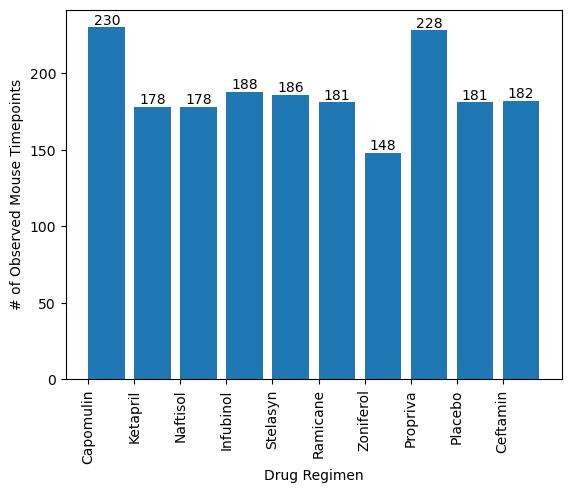

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig,xy = plt.subplots()
chart = xy.bar(x,y, alpha=1, align="edge")
xy.bar_label(chart)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

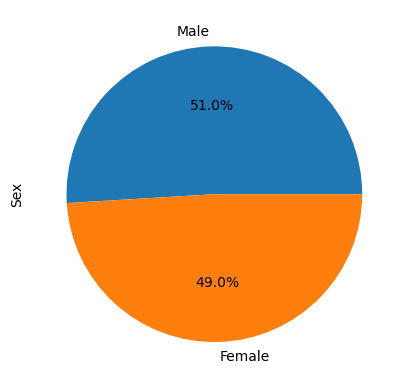

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_clean["Sex"].value_counts().plot(kind="pie",autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2bd69eb1e90>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

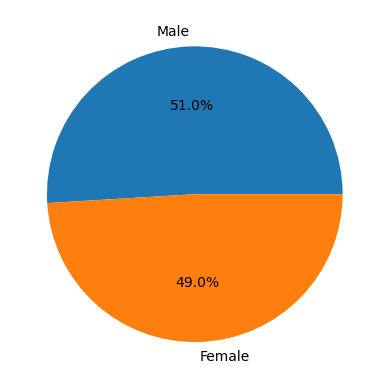

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df = mouse_study_clean["Sex"].value_counts()
labels = ["Male","Female"]
plt.pie(df,labels = labels,autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_name = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = mouse_study_clean.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(mouse_study_clean,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Create empty list to fill with tumor vol data (for plotting) 
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_name:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    
    # Add tumor volumes to the list for plotting
    tumor_volume_data.append(final_tumor_volumes)

    
    # Calculate the IQR for this treatment
    
    lowerq = final_tumor_volumes.quantile(0.25)
    upperq = final_tumor_volumes.quantile(0.75)
    iqr = upperq - lowerq
    print(f"interquartile range (IQR) for {treatment} is : {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Identify potential outliers
    outliers = final_tumor_volumes.loc[(final_tumor_volumes < lower_bound) | 
                               (final_tumor_volumes > upper_bound)]

    print(f"For {treatment}, potential outliers are: ")
    print(outliers)


interquartile range (IQR) for Capomulin is : 7.781863460000004
For Capomulin, potential outliers are: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
interquartile range (IQR) for Ramicane is : 9.098536719999998
For Ramicane, potential outliers are: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
interquartile range (IQR) for Infubinol is : 11.477135160000003
For Infubinol, potential outliers are: 
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
interquartile range (IQR) for Ceftamin is : 15.577752179999997
For Ceftamin, potential outliers are: 
Series([], Name: Tumor Volume (mm3), dtype: float64)


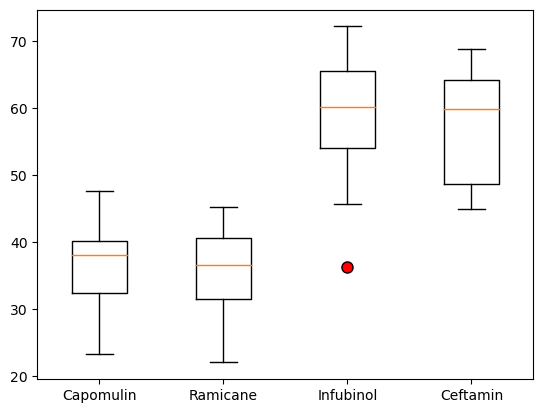

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
color = dict(markerfacecolor = "red", markersize = 8)
plt.boxplot(tumor_volume_data,labels = treatment_name,flierprops = color)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

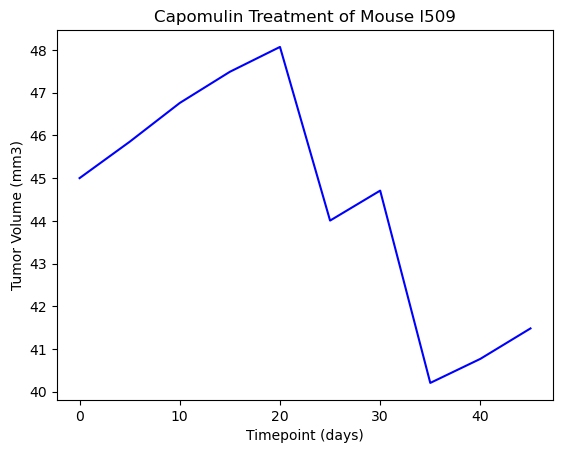

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = mouse_study_clean[(mouse_study_clean['Mouse ID'] == 'l509') & (mouse_study_clean['Drug Regimen'] == 'Capomulin')]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'],color='blue', label='Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

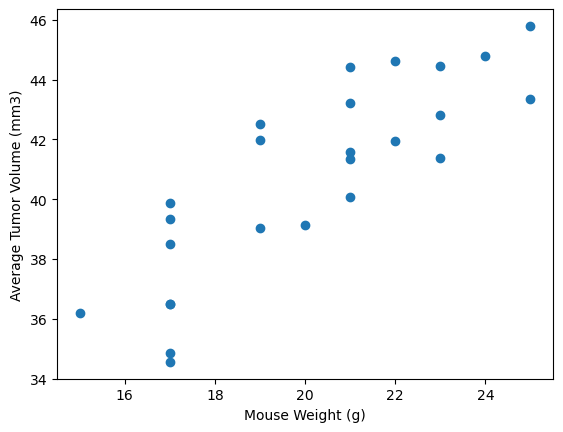

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_data_scatter = mouse_study_clean[(mouse_study_clean['Drug Regimen'] == 'Capomulin')]
mouse_weights_X = mouse_data_scatter.groupby('Mouse ID')['Weight (g)'].unique().str[0]                                      
avg_tumor_volume_Y = mouse_data_scatter.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(mouse_weights_X,avg_tumor_volume_Y)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

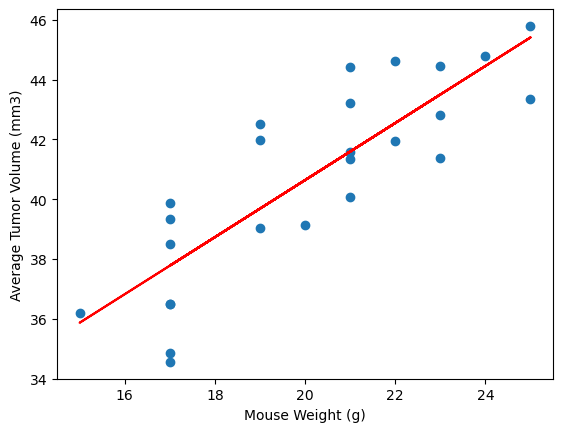

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = avg_tumor_volume_Y.corr(mouse_weights_X)
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights_X, avg_tumor_volume_Y)
plt.scatter(mouse_weights_X,avg_tumor_volume_Y)
plt.plot(mouse_weights_X, slope*mouse_weights_X + intercept, color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')